In [1]:
# Setting environment for McStas execution, see mcstas/bin/mccodeenv.bat
import os
import shutil
PATH = os.environ['PATH']
%set_env PATH=C:\\mcstas-3.3\\bin;C:\\mcstas-3.3\\miniconda3;C:\\mcstas-3.3\\miniconda3\\Scripts\\;C:\\mcstas-3.3\\miniconda3\\Library\\bin;C:\\mcstas-3.3\\miniconda3\\Library\\mingw-w64\\bin;c:\\strawberry\\perl\\bin;c:\\Microsoft MPI\\Bin;$PATH
# McStas related:
%set_env MCSTAS=C:\\mcstas-3.3\\lib
%set_env MCSTAS_TOOLS=C:\\mcstas-3.3\\lib\\tools\\Perl\\
%set_env MCSTAS_CC=gcc
%set_env MCSTAS_FORMAT=
# PGPLOT configuration
%set_env PGPLOT_DIR=c:\\strawberry\\perl\\site\\lib\\PGPLOT\\pgplot_supp
%set_env PGPLOT_FONT=c:\\strawberry\\perl\\site\\lib\\PGPLOT\\pgplot_supp\\grfont.dat
%set_env PGPLOT_DEV=/gw

env: PATH=C:\\mcstas-3.3\\bin;C:\\mcstas-3.3\\miniconda3;C:\\mcstas-3.3\\miniconda3\\Scripts\\;C:\\mcstas-3.3\\miniconda3\\Library\\bin;C:\\mcstas-3.3\\miniconda3\\Library\\mingw-w64\\bin;c:\\strawberry\\perl\\bin;c:\\Microsoft MPI\\Bin;C:\Users\artur\anaconda3\envs\dana310;C:\Users\artur\anaconda3\envs\dana310\Library\mingw-w64\bin;C:\Users\artur\anaconda3\envs\dana310\Library\usr\bin;C:\Users\artur\anaconda3\envs\dana310\Library\bin;C:\Users\artur\anaconda3\envs\dana310\Scripts;C:\Users\artur\anaconda3\envs\dana310\bin;C:\Users\artur\anaconda3\condabin;C:\Program Files\ConEmu\ConEmu\Scripts;C:\Program Files\ConEmu;C:\Program Files\ConEmu\ConEmu;C:\Python311\Scripts;C:\Python311;C:\WINDOWS\system32;C:\WINDOWS;C:\WINDOWS\System32\Wbem;C:\WINDOWS\System32\WindowsPowerShell\v1.0;C:\WINDOWS\System32\OpenSSH;C:\Program Files (x86)\NVIDIA Corporation\PhysX\Common;C:\Program Files\dotnet;C:\Program Files (x86)\Common Files\Remote Speakers output;C:\WINDOWS\system32;C:\WINDOWS;C:\WINDOWS\Syst

In [2]:
# Compile McStas models
!mcstas -o GISANS_events.c GISANS_events.instr
!gcc -O2 -o GISANS_events.exe GISANS_events.c -lm
!mcstas -o GISANS_events_back.c GISANS_events_back.instr
!gcc -O2 -o GISANS_events_back.exe GISANS_events_back.c -lm


-----------------------------------------------------------

Generating single GPU kernel or single CPU section layout: 

-----------------------------------------------------------

Generating GPU/CPU -DFUNNEL layout:
Component sample_out is NOACC, CPUONLY=1
-> FUNNEL mode enabled, SPLIT within buffer.
-> CPU section from component sample_out
-> GPU kernel from component DETfin

-----------------------------------------------------------


CFLAGS= -DFUNNEL 
GISANS_events.c: In function 'mcuse_dir':
GISANS_events.c:3628:8: warning: implicit declaration of function 'mkdir' [-Wimplicit-function-declaration]
     if(mkdir(dirname, 0777)) {
        ^
GISANS_events.c: In function 'sighandler':
GISANS_events.c:5539:64: warning: implicit declaration of function 'getpid' [-Wimplicit-function-declaration]
   printf("\n# " MCCODE_STRING ": [pid %i] Signal %i detected", getpid(), sig);
                                                                ^



-----------------------------------------------------------

Generating single GPU kernel or single CPU section layout: 

-----------------------------------------------------------

Generating GPU/CPU -DFUNNEL layout:
Component sample_in is NOACC, CPUONLY=1
-> FUNNEL mode enabled, SPLIT within buffer.
-> CPU section from component sample_in
-> GPU kernel from component DETfin

-----------------------------------------------------------


CFLAGS= -DFUNNEL 
GISANS_events_back.c: In function 'mcuse_dir':
GISANS_events_back.c:3628:8: warning: implicit declaration of function 'mkdir' [-Wimplicit-function-declaration]
     if(mkdir(dirname, 0777)) {
        ^
GISANS_events_back.c: In function 'sighandler':
GISANS_events_back.c:5539:64: warning: implicit declaration of function 'getpid' [-Wimplicit-function-declaration]
   printf("\n# " MCCODE_STRING ": [pid %i] Signal %i detected", getpid(), sig);
                                                                ^


In [3]:
# Create events for sample position, need to remove directory if it exists
try:
    shutil.rmtree('GISANS_events')
except FileNotFoundError:  pass
!.\GISANS_events.exe -n 1e3 -d .\GISANS_events\

Instrument parameters for GISANS_test (GISANS_events.instr)
*** TRACE end *** 
Events:   "test_events.dat"
Detector: DETfin_I=1000.56 DETfin_ERR=31.6591 DETfin_N=1000 "PSDfin.txt"
Virtual_output: sample_out: Saved 1000 events (all) in file test_events.dat


In [4]:
# run the generated events with BornAgain model, see models path for available examples
# each incoming event is split into 100
%run events2BA.py silica_100nm_air

Reading events from GISANS_events/test_events.dat...
Running BornAgain simulations "models.silica_100nm_air" for each event...
         0/999
       200/999
       400/999
       600/999
       800/999
misses: 0
Writing events to test_events_scattered.dat...


In [5]:
# Create events for sample position, need to remove directory if it exists
try:
    shutil.rmtree('GISANS_events_scattered')
except FileNotFoundError:  pass
!.\GISANS_events_back.exe -n 1e6 -d .\GISANS_events_scattered

Instrument parameters for GISANS_test (GISANS_events_back.instr)
Opening input file 'test_events_scattered.dat' (Table_Read_Offset)
Opening input file 'test_events_scattered.dat' (Table_Read_Offset)
Opening input file 'test_events_scattered.dat' (Table_Read_Offset)
Opening input file 'test_events_scattered.dat' (Table_Read_Offset)
*** TRACE end *** 
Detector: DETfin_I=1351.06 DETfin_ERR=47.2232 DETfin_N=77037 "PSDfin.txt"


In [6]:
# plot the resulting simulation
%pylab inline
from matplotlib.colors import LogNorm
from mcstas_reader import McSim

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [7]:
data=McSim('GISANS_events_scattered')['DETfin']

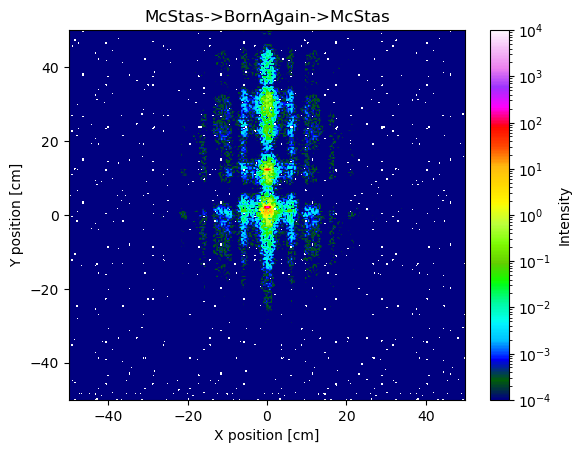

In [8]:
McSim('GISANS_events_scattered')['DETfin'].plot(norm=LogNorm(1e-4, 1e4), cmap='gist_ncar', cbar=True)
title('McStas->BornAgain->McStas');